### Airbnb Pricing Project -- Milan

* We start with importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

* Loading the dataset and evaluating the statistics:

In [2]:
data = pd.read_csv('listings.csv')

print(data.head())

        id                           listing_url       scrape_id last_scraped  \
0     6400     https://www.airbnb.com/rooms/6400  20230913045258   2023-09-14   
1    23986    https://www.airbnb.com/rooms/23986  20230913045258   2023-09-14   
2  1734055  https://www.airbnb.com/rooms/1734055  20230913045258   2023-09-14   
3   189441   https://www.airbnb.com/rooms/189441  20230913045258   2023-09-13   
4  2192436  https://www.airbnb.com/rooms/2192436  20230913045258   2023-09-14   

        source                                               name  \
0  city scrape  Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...   
1  city scrape  Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...   
2  city scrape  Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...   
3  city scrape  Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...   
4  city scrape  Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...   

                                         description  \
0  Enjoy your stay at The Studio, a light-

* Let's proceed with omitting the unnecessary columns.

In [3]:
cols = data.columns
cols

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
## Adding a new column to the data frame: new_data = 1
data['new_data'] = 1

In [5]:
# loading the listings-Dec2022.csv file
data2 = pd.read_csv('listings-Dec2022.csv')

# adding a new column to the data frame: new_data = 0
data2['new_data'] = 0

In [6]:
# merging the two data frames
data = pd.concat([data, data2])

# checking the shape of the new data frame
data.shape

(43108, 76)

### Dropping the unnecessary columns

In [7]:
drop_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped','source', 'description', 'neighborhood_overview',
              'picture_url', 'host_id','host_url', 'host_name', 'host_total_listings_count','host_since',
              'host_location','host_verifications' ,'host_about','host_is_superhost' ,'host_thumbnail_url',
              'host_picture_url','host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed',
              'latitude', 'longitude', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'calendar_updated', 'availability_60', 'availability_90', 'availability_365', 
              'calendar_last_scraped', 'first_review', 'last_review', 'number_of_reviews_ltm', 'review_scores_accuracy',
              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'number_of_reviews_l30d',
              'host_listings_count', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']

data = data.drop(drop_cols, axis=1)
data.shape

(43108, 22)

In [8]:
data.head()

,name,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,beds,amenities,price,has_availability,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,new_data
0,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,NaN,NaN,0%,t,f,TIBALDI,Private room in rental unit,Private room,1,...,1.0,"[""Washer"", ""Kitchen"", ""Paid parking on premise...",$100.00,t,23,12,4.89,f,0.07,1
1,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,within a day,100%,56%,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,...,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Extra p...",$150.00,t,23,26,4.64,f,0.19,1
2,Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...,within a day,100%,50%,t,t,SARPI,Entire rental unit,Entire home/apt,2,...,1.0,"[""Dishwasher"", ""Heating"", ""Hangers"", ""Dryer"", ...",$171.00,t,24,20,4.58,f,0.20,1
3,Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...,within an hour,100%,89%,t,t,BOVISASCA,Private room in loft,Private room,1,...,1.0,"[""HDTV with Netflix"", ""Dishwasher"", ""Heating"",...",$40.00,t,13,142,4.70,f,1.00,1
4,Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...,within an hour,100%,75%,t,t,TORTONA,Entire rental unit,Entire home/apt,2,...,1.0,"[""Heating"", ""Shower gel"", ""Hangers"", ""Room-dar...",$94.00,t,1,169,4.85,t,1.47,1


### Checking for missing values:

In [9]:
# Data Cleaning
# check for missing values
data.isnull().sum()

name                          7
host_response_time        11095
host_response_rate        11095
host_acceptance_rate       8030
host_has_profile_pic          0
host_identity_verified        0
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms_text               24
bedrooms                   6847
beds                        555
amenities                     0
price                         0
has_availability              0
availability_30               0
number_of_reviews             0
review_scores_rating       8392
instant_bookable              0
reviews_per_month          8392
new_data                      0
dtype: int64

* It seems that there are a lot of missing values for number of the "bedrooms" which could be an important feature. 
* The good point is that we can extract the number of bedrooms from the column "name". 

In [10]:
# Extracting number of bedrooms from the name column
data['num_bedrooms'] = data['name'].str.extract('(\d+) bedroom', expand=True)

# checking for missing values in the new column
data['num_bedrooms'].isnull().sum()

20253

* Since the number of missing values for the new column is less than the previous column, we can replace the missing value of the original column with the new feature values.

In [11]:
# Replacing the missing values in column "bedrooms" with the values in column "num_bedrooms"
data['bedrooms'] = data['bedrooms'].fillna(data['num_bedrooms'])

# checking for missing values in the "bedrooms" column
data['bedrooms'].isnull().sum()

2869

In [12]:
# dropping the "num_bedrooms" column
data = data.drop('num_bedrooms', axis=1)

In [13]:
# dropping the rows with missing values in the "bedrooms" column
data = data.dropna(subset=['bedrooms'])

* It does not seem that these 3 variables are very esseintial to our model: "host_response_time", "host_response_rate", "host_acceptance_rate".
* Considering the number of missing values for these columns, a trivial choice is to drop them as well. 

In [14]:
# Dropping the columns: "host_response_time", "host_response_rate", "host_acceptance_rate"
data = data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

In [15]:
# dropping the rows with missing values in the "beds" and "bathrooms_text" columns
data = data.dropna(subset=['beds', 'bathrooms_text'])

* A closer look to the data shows that, the 0 ratings could be equivalent to missing values. 
* If the number of these observations is limited, we can drop them all. Otherwise we need to replace them with the mean.

In [16]:
# Checking for the number of observations with review_scores_rating = 0
data[data['review_scores_rating'] == 0].shape

(318, 19)

In [17]:
# dropping the rows with review_scores_rating = 0
data = data[data['review_scores_rating'] != 0]

In [18]:
# checking the statistics of the "review_scores_rating" column
data['review_scores_rating'].describe()

count    31669.000000
mean         4.685539
std          0.464426
min          1.000000
25%          4.580000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

* It seems plausible to replace the missing values with the mean.

In [19]:
# replacing the missing values in the "review_scores_rating" column with the mean
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].mean())

# replacing the missing values in the "reviews_per_month" column with the mean
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [20]:
data.isnull().sum()

name                      6
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
has_availability          0
availability_30           0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
reviews_per_month         0
new_data                  0
dtype: int64

In [21]:
# Dropping the column "name" - we have extracted all the information we need from it
data = data.drop('name', axis=1)

### Encoding Categorical Variables

In [22]:
# Checking the data types of the columns
data.dtypes

host_has_profile_pic       object
host_identity_verified     object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                   object
beds                      float64
amenities                  object
price                      object
has_availability           object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
new_data                    int64
dtype: object

* These variables are categorical and need to be converted: 
"host_has_profile_pic", "host_identity_verified", 'neighbourhood_cleansed', 'property_type', 'room_type', 'has_availability', 'instant_bookable'

In [23]:
# Converting the above columns to categorical variables
data['host_has_profile_pic'] = data['host_has_profile_pic'].astype('category')
data['host_identity_verified'] = data['host_identity_verified'].astype('category')
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].astype('category')
data['room_type'] = data['room_type'].astype('category')
data['has_availability'] = data['has_availability'].astype('category')
data['instant_bookable'] = data['instant_bookable'].astype('category')
data['property_type'] = data['property_type'].astype('category')

In [24]:
data.head()

,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,new_data
0,t,f,TIBALDI,Private room in rental unit,Private room,1,3.5 baths,3,1.0,"[""Washer"", ""Kitchen"", ""Paid parking on premise...",$100.00,t,23,12,4.89,f,0.07,1
1,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Extra p...",$150.00,t,23,26,4.64,f,0.19,1
2,t,t,SARPI,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Dishwasher"", ""Heating"", ""Hangers"", ""Dryer"", ...",$171.00,t,24,20,4.58,f,0.20,1
3,t,t,BOVISASCA,Private room in loft,Private room,1,1 shared bath,1.0,1.0,"[""HDTV with Netflix"", ""Dishwasher"", ""Heating"",...",$40.00,t,13,142,4.70,f,1.00,1
4,t,t,TORTONA,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""Shower gel"", ""Hangers"", ""Room-dar...",$94.00,t,1,169,4.85,t,1.47,1


In [25]:
data.dtypes

host_has_profile_pic      category
host_identity_verified    category
neighbourhood_cleansed    category
property_type             category
room_type                 category
accommodates                 int64
bathrooms_text              object
bedrooms                    object
beds                       float64
amenities                   object
price                       object
has_availability          category
availability_30              int64
number_of_reviews            int64
review_scores_rating       float64
instant_bookable          category
reviews_per_month          float64
new_data                     int64
dtype: object

* These 3 columns need to be converted to numeric type: "bathrooms_text", "bedrooms", "price"

In [26]:
data['bathrooms_text'].head()

0        3.5 baths
1           1 bath
2           1 bath
3    1 shared bath
4           1 bath
Name: bathrooms_text, dtype: object

In [27]:
# Extracting the number of bathrooms from the "bathrooms_text" column
data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+) ', expand=True)

# Converting the "bathrooms" column to numeric
data['bathrooms'] = pd.to_numeric(data['bathrooms'])

# Dropping the "bathrooms_text" column
data = data.drop('bathrooms_text', axis=1)

# Converting the "bedrooms" column to numeric
data['bedrooms'] = pd.to_numeric(data['bedrooms'])

In [28]:
data['price'].head()

0    $100.00
1    $150.00
2    $171.00
3     $40.00
4     $94.00
Name: price, dtype: object

In [29]:
# Extracting the numberic part from the "price" column
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = pd.to_numeric(data['price'])

C:\Users\PA\AppData\Local\Temp\ipykernel_9380\528802465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '')


In [30]:
data.shape

(39395, 18)

In [31]:
# Convering the categorical variables to dummy variables
data = pd.get_dummies(data, columns= ['host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'room_type', 'has_availability','instant_bookable', 'property_type'] ,drop_first=True)

In [32]:
# Store the cleaned data in a new dataframe
data_cleaned = data.copy()

data.shape

(39395, 156)

* The "amenities" column include several strings which every one of them can be considered as a dummy.

In [33]:
data['amenities'].head()

0    ["Washer", "Kitchen", "Paid parking on premise...
1    ["Hot water", "Washer", "Bed linens", "Extra p...
2    ["Dishwasher", "Heating", "Hangers", "Dryer", ...
3    ["HDTV with Netflix", "Dishwasher", "Heating",...
4    ["Heating", "Shower gel", "Hangers", "Room-dar...
Name: amenities, dtype: object

In [34]:
# The "amenities" column include several strings which every one of them can be considered as a dummy.
# Convert the 'amenities' column from a string representation of a list to an actual list
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data['amenities'] = data['amenities'].str.strip('[]').str.replace('"', '').str.split(',')
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('amenities')),
                                columns=mlb.classes_,
                                index=data.index))

### Filtering the data based on the number of the guests

In [35]:
# Filtering the data based on "accommodates" between 2 and 6
data = data[(data['accommodates'] >= 2) & (data['accommodates'] <= 6)]


In [36]:
# Removing the columns without proper names
data = data.drop(['', ' '], axis=1)

In [37]:
data.shape

(64618, 4223)

In [38]:
# storing the cleaned data in a new dataframe
data_cleaned_2 = data.copy()

### Dropping the columns with more than 99% zeros
* As we can see our dataset has 3788 columns now; which makes the computations very costly.
* On the other hand, for a lot of amenities we have only one active (1) observation.
* It makes sense to omit these columns. Not only this procedure makes the computations more efficient, it also increase the accuracy of the models.

In [39]:
# checking the percentage of zeros in each column
data_zero = (data == 0).astype(int).sum(axis=0)
data_zero = data_zero/data.shape[0]
data_zero = data_zero.sort_values(ascending=False)

# Checking the number of columns with more than 99% zeros
data_zero[data_zero > 0.99].shape[0]

3997

In [40]:
# Dropping the observations with a price higher than 5000
data = data[data['price'] <= 5000]

C:\Users\PA\AppData\Local\Temp\ipykernel_9380\82555254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


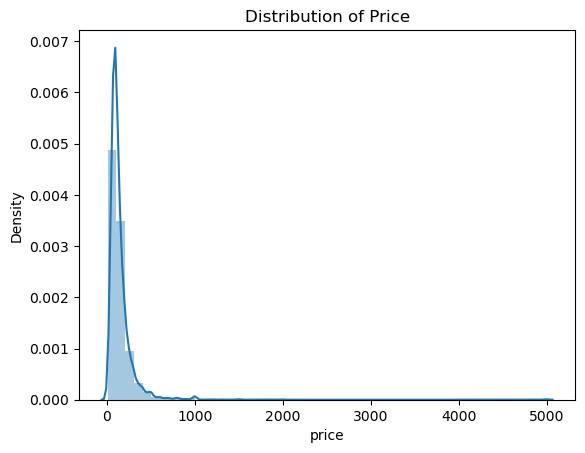

In [41]:
# Checking the distribution of the target variable
sns.distplot(data['price'])
plt.title('Distribution of Price')
plt.show()

### Deleting the observations with missing values

In [42]:
# checking the missing values
sum(data.isnull().sum())

51

In [43]:
# dropping the rows with missing values
data = data.dropna()


In [44]:
"""# Storing the cleaned data in a new csv file
data.to_csv('data_cleaned_2.csv', index=False)"""

"# Storing the cleaned data in a new csv file\ndata.to_csv('data_cleaned_2.csv', index=False)"

In [45]:
# Dropping the columns with more than 99% zeros
data_2 = data.drop(data_zero[data_zero > 0.99].index, axis=1)

In [46]:
data_2.shape, data.shape

((64437, 226), (64437, 4223))

In [47]:
# Seperating the new and old data using the column "new_data"
data_new = data_2[data_2['new_data'] == 1]
data_dec = data_2[data_2['new_data'] == 0]

In [48]:
# Dropping the "new_data" column
data_new = data_new.drop('new_data', axis=1)
data_dec = data_dec.drop('new_data', axis=1)

# Splitting Data:
1. Target variable and the features
2. Test and Train Sets

In [49]:
# Splitting target variable and predictors
X = data_new.drop('price', axis=1)
y = data_new['price']

In [50]:
# Splitting target variable and predictors for the Dec data
X_dec = data_dec.drop('price', axis=1)
y_dec = data_dec['price']

In [51]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=122)

* For linear regression it is necessary to scale the data.

In [52]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Scaling the new data
X_dec_scaled = scaler.transform(X_dec)

# Models

In [54]:
# Preparing some lists to store the results
models = []
Train_RMSE = []
Test_RMSE = []
Dec_RMSE = []

## LASSO - Feature Selection

* We have lots of features, which probably many of them are not important and deterministic in price prediction.
* We implement LASSO in the first step, to omit the unnecessary features.
* Then we run an OLS model on the remaining features.

In [55]:
# Avoiding the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# implementing the LASSO method with the optimal regularization parameter
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Lasso- Parameter tuning using cross validation
alphas = np.logspace(-6, 2, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Stoing the best lambda value
selected_alpha = lasso_cv.alpha_
print("Best lambda value: ", selected_alpha)

warnings.resetwarnings()

Best lambda value:  0.7847599703514607


In [56]:
# Define the LASSO model using the best parameter
best_lasso_model = Lasso(alpha=selected_alpha)
best_lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.7847599703514607)

In [57]:
# Checking the number of non-zero coefficients of the LASSO model
print("Number of non-zero coefficients: ", np.sum(best_lasso_model.coef_ != 0))

Number of non-zero coefficients:  154


In [58]:
# getting the features from the LASSO model that have a non-zero coefficient
selected_features = X.columns[best_lasso_model.coef_ != 0]
selected_features

Index(['accommodates', 'bedrooms', 'beds', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
       'bathrooms', 'host_has_profile_pic_t', 'host_identity_verified_t',
       ...
       'Clothing storage', 'Coffee maker: Nespresso', 'Elevator', 'Gas stove',
       'Heating', 'Hot water', 'Kitchen', 'Outdoor dining area',
       'Pets allowed', 'Single level home'],
      dtype='object', length=154)

In [59]:
# Choosing training and testing sets based on the selected features
X_train_selected = X_train_scaled[:, best_lasso_model.coef_ != 0]
X_test_selected = X_test_scaled[:, best_lasso_model.coef_ != 0]

In [60]:
# choosing the same features for the new data
X_dec_selected = X_dec_scaled[:, best_lasso_model.coef_ != 0]

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating a linear regression model
ols_model = LinearRegression()

# Fitting the model
ols_model.fit(X_train_selected, y_train)

# Checking the model performance on the training data
y_train_pred = ols_model.predict(X_train_selected)
ols_train_mse = mean_squared_error(y_train, y_train_pred)
ols_train_rmse = np.sqrt(ols_train_mse)
ols_train_mae = np.mean(np.abs(y_train - y_train_pred))
ols_train_r2 = ols_model.score(X_train_selected, y_train)
print('Training MSE:', ols_train_mse, '\n', 'Training RMSE:', ols_train_rmse,
      '\n', 'Training MAE:', ols_train_mae, '\n', 'Training R2:', ols_train_r2)

# Checking the model performance on the test data
y_test_pred = ols_model.predict(X_test_selected)
ols_test_mse = mean_squared_error(y_test, y_test_pred)
ols_test_rmse = np.sqrt(ols_test_mse)
ols_test_mae = np.mean(np.abs(y_test - y_test_pred))
ols_test_r2 = ols_model.score(X_test_selected, y_test)
print('Test MSE:', ols_test_mse, '\n', 'Test RMSE:', ols_test_rmse,
      '\n', 'Test MAE:', ols_test_mae, '\n', 'Test R2:', ols_test_r2)

Training MSE: 42228.51590405695 
 Training RMSE: 205.4957807451456 
 Training MAE: 78.42070927034386 
 Training R2: 0.12315426626129622
Test MSE: 45781.85299929151 
 Test RMSE: 213.96694370694624 
 Test MAE: 80.98481823868265 
 Test R2: 0.1070775437682282


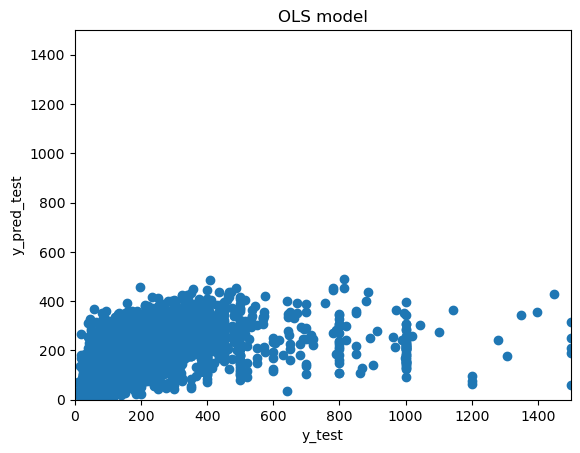

In [62]:
# Plotting the results of OLS prediction
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.title('OLS model')
plt.show()

In [63]:
# Checking the model performance on the new data
y_new_pred = ols_model.predict(X_dec_selected)
ols_new_mse = mean_squared_error(y_dec, y_new_pred)
ols_new_rmse = np.sqrt(ols_new_mse)
ols_new_mae = np.mean(np.abs(y_dec - y_new_pred))
ols_new_r2 = ols_model.score(X_dec_selected, y_dec)
print('New MSE:', ols_new_mse, '\n', 'New RMSE:', ols_new_rmse,
      '\n', 'New MAE:', ols_new_mae, '\n', 'New R2:', ols_new_r2)

New MSE: 32525.585442059004 
 New RMSE: 180.34851106138638 
 New MAE: 86.76946851883662 
 New R2: 0.019597542740314222


In [64]:
# Recording the results
models.append('OLS')
Train_RMSE.append(ols_train_rmse)
Test_RMSE.append(ols_test_rmse)
Dec_RMSE.append(ols_new_rmse)

# Decision Tree Regression Model

In [65]:
from sklearn.tree import DecisionTreeRegressor
# Creating a decision tree regression model
dtree_model = DecisionTreeRegressor(random_state=42)

# Fitting the model to the training data
dtree_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model.predict(X_train)
dtree_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_train_rmse = np.sqrt(dtree_train_mse)
dtree_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_train_r2 = dtree_model.score(X_train, y_train)
print('Training MSE:', dtree_train_mse, '\n', 'Training RMSE:', dtree_train_rmse,
      '\n', 'Training MAE:', dtree_train_mae, '\n', 'Training R2:', dtree_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model.predict(X_test)
dtree_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_test_rmse = np.sqrt(dtree_test_mse)
dtree_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_test_r2 = dtree_model.score(X_test, y_test)
print('Test MSE:', dtree_test_mse, '\n', 'Test RMSE:', dtree_test_rmse,
      '\n', 'Test MAE:', dtree_test_mae, '\n', 'Test R2:', dtree_test_r2)

Training MSE: 0.11685644277889881 
 Training RMSE: 0.3418427164338869 
 Training MAE: 0.004540213317959066 
 Training R2: 0.9999975735573198
Test MSE: 59288.83010233497 
 Test RMSE: 243.49297752160118 
 Test MAE: 83.90465552032286 
 Test R2: -0.1563605300751898


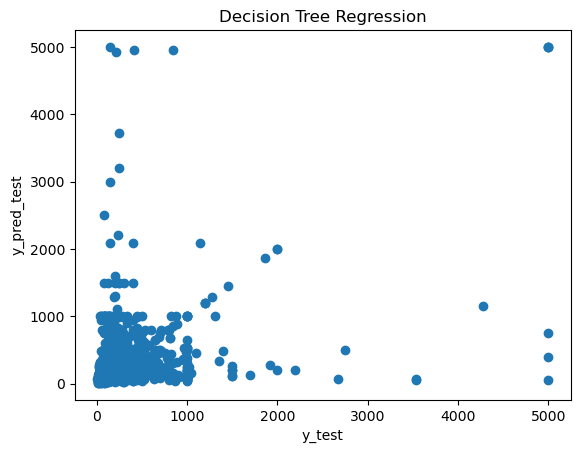

In [66]:
# Plotting the results from the default regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Decision Tree Regression')
plt.show()

In [67]:
# Checking the model performance on the new data
y_new_pred = dtree_model.predict(X_dec)
dtree_new_mse = mean_squared_error(y_dec, y_new_pred)
dtree_new_rmse = np.sqrt(dtree_new_mse)
dtree_new_mae = np.mean(np.abs(y_dec - y_new_pred))
dtree_new_r2 = dtree_model.score(X_dec, y_dec)
print('New MSE:', dtree_new_mse, '\n', 'New RMSE:', dtree_new_rmse,
      '\n', 'New MAE:', dtree_new_mae, '\n', 'New R2:', dtree_new_r2)

New MSE: 88961.017672293 
 New RMSE: 298.2633361180905 
 New MAE: 99.02292836252396 
 New R2: -1.681507469914957


In [68]:
# Recording the results
models.append('Decision Tree - Default')
Train_RMSE.append(dtree_train_rmse)
Test_RMSE.append(dtree_test_rmse)
Dec_RMSE.append(dtree_new_rmse)

In [69]:
# defining the grid of parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(3, 20), 'min_samples_leaf': np.arange(5, 20), 'min_samples_split': np.arange(5, 20)}

# defining the model
dtree_model_cv = DecisionTreeRegressor(random_state=42)

# defining the random search
dtree_cv = RandomizedSearchCV(dtree_model_cv, param_grid, cv = 5)

# fitting the model to the training data
dtree_cv.fit(X_train, y_train)
# storing the best parameters
best_params = dtree_cv.best_params_

# printing the best parameters
print("Tuned Decision Tree Parameters: {}".format(best_params))

Tuned Decision Tree Parameters: {'min_samples_split': 14, 'min_samples_leaf': 19, 'max_depth': 10}


In [70]:
# Creating a decision tree regression model with the best parameters
dtree_model_best = DecisionTreeRegressor(random_state=42, **best_params)

# Fitting the model to the training data
dtree_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model_best.predict(X_train)
dtree_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_tuned_train_rmse = np.sqrt(dtree_tuned_train_mse)
dtree_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_tuned_train_r2 = dtree_model_best.score(X_train, y_train)
print('Training MSE:', dtree_tuned_train_mse, '\n', 'Training RMSE:', dtree_tuned_train_rmse,
      '\n', 'Training MAE:', dtree_tuned_train_mae, '\n', 'Training R2:', dtree_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model_best.predict(X_test)
dtree_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_tuned_test_rmse = np.sqrt(dtree_tuned_test_mse)
dtree_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_tuned_test_r2 = dtree_model_best.score(X_test, y_test)
print('Test MSE:', dtree_tuned_test_mse, '\n', 'Test RMSE:', dtree_tuned_test_rmse,
      '\n', 'Test MAE:', dtree_tuned_test_mae, '\n', 'Test R2:', dtree_tuned_test_r2)

Training MSE: 36694.10212814406 
 Training RMSE: 191.55704666794188 
 Training MAE: 74.61936187391005 
 Training R2: 0.23807251532265394
Test MSE: 42253.850284106746 
 Test RMSE: 205.55741359558587 
 Test MAE: 79.41356664356661 
 Test R2: 0.17588718434970252


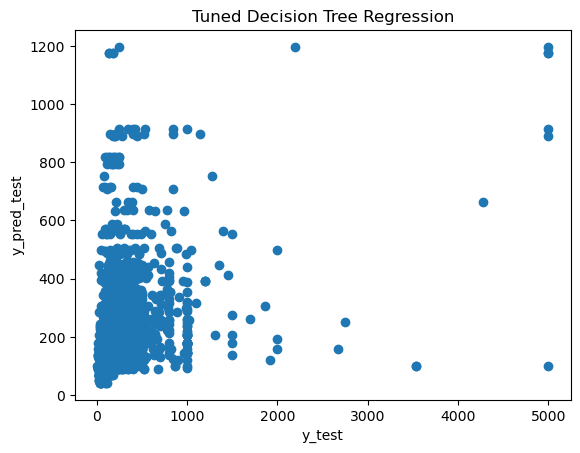

In [71]:
# Plotting the results from the Tuned regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Tuned Decision Tree Regression')
plt.show()

In [72]:
# Checking the model performance on the new data
y_new_pred = dtree_model_best.predict(X_dec)
dtree_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
dtree_tuned_new_rmse = np.sqrt(dtree_tuned_new_mse)
dtree_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
dtree_tuned_new_r2 = dtree_model_best.score(X_dec, y_dec)
print('New MSE:', dtree_tuned_new_mse, '\n', 'New RMSE:', dtree_tuned_new_rmse,
      '\n', 'New MAE:', dtree_tuned_new_mae, '\n', 'New R2:', dtree_tuned_new_r2)

New MSE: 37766.867809272044 
 New RMSE: 194.33699547248344 
 New MAE: 87.43360323121993 
 New R2: -0.1383878107027885


In [73]:
# Recording the results
models.append('Decision Tree - Tuned')
Train_RMSE.append(dtree_tuned_train_rmse)
Test_RMSE.append(dtree_tuned_test_rmse)
Dec_RMSE.append(dtree_tuned_new_rmse)

# K-Nearest Neighbors (KNN) Regression

In [74]:
# Creating a KNN regression model
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()

# Fitting the model to the training data
knn_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model.predict(X_train)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_rmse = np.sqrt(knn_train_mse)
knn_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_train_r2 = knn_model.score(X_train, y_train)
print('Training MSE:', knn_train_mse, '\n', 'Training RMSE:', knn_train_rmse,
      '\n', 'Training MAE:', knn_train_mae, '\n', 'Training R2:', knn_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model.predict(X_test)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)
knn_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_test_r2 = knn_model.score(X_test, y_test)
print('Test MSE:', knn_test_mse, '\n', 'Test RMSE:', knn_test_rmse,
      '\n', 'Test MAE:', knn_test_mae, '\n', 'Test R2:', knn_test_r2)

Training MSE: 31241.229257711155 
 Training RMSE: 176.75188615036376 
 Training MAE: 69.6188166618622 
 Training R2: 0.35129762424956423
Test MSE: 45756.99492649179 
 Test RMSE: 213.90884723753663 
 Test MAE: 87.42075526088209 
 Test R2: 0.10756237192539908


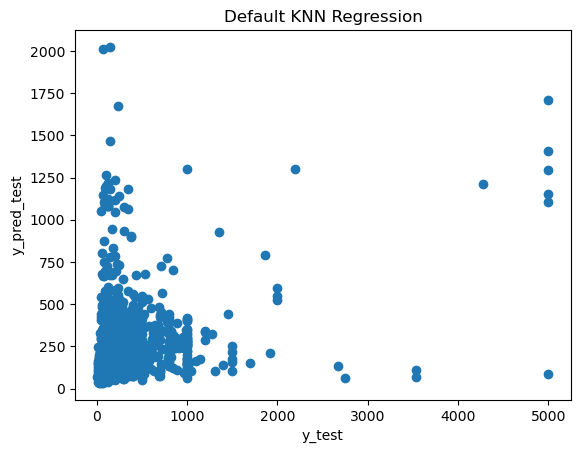

In [75]:
# Plotting the results from the Default KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Default KNN Regression')
plt.show()

In [76]:
# Checking the model performance on the new data
y_new_pred = knn_model.predict(X_dec)
knn_new_mse = mean_squared_error(y_dec, y_new_pred)
knn_new_rmse = np.sqrt(knn_new_mse)
knn_new_mae = np.mean(np.abs(y_dec - y_new_pred))
knn_new_r2 = knn_model.score(X_dec, y_dec)
print('New MSE:', knn_new_mse, '\n', 'New RMSE:', knn_new_rmse,
      '\n', 'New MAE:', knn_new_mae, '\n', 'New R2:', knn_new_r2)

New MSE: 37745.612667015164 
 New RMSE: 194.28230147652454 
 New MAE: 86.36818872491342 
 New R2: -0.13774712757857022


In [77]:
# Recording the results
models.append('KNN - Default')
Train_RMSE.append(knn_train_rmse)
Test_RMSE.append(knn_test_rmse)
Dec_RMSE.append(knn_new_rmse)

# Tuned KNN Regression

In [78]:
# defining the grid of parameters
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance']}

# defining the model
knn_model_cv = KNeighborsRegressor()

# defining the random search
knn_cv = RandomizedSearchCV(knn_model_cv, param_grid, cv = 5)

# fitting the model to the training data
knn_cv.fit(X_train, y_train)

# storing the best parameters
best_params = knn_cv.best_params_

In [79]:
# printing the best parameters
print("Tuned KNN Parameters: {}".format(best_params))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 19}


In [80]:
# Creating a KNN regression model with the best parameters
knn_model_best = KNeighborsRegressor(**best_params)
# Fitting the model to the training data
knn_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model_best.predict(X_train)
knn_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
knn_tuned_train_rmse = np.sqrt(knn_tuned_train_mse)
knn_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_tuned_train_r2 = knn_model_best.score(X_train, y_train)
print('Training MSE:', knn_tuned_train_mse, '\n', 'Training RMSE:', knn_tuned_train_rmse,
      '\n', 'Training MAE:', knn_tuned_train_mae, '\n', 'Training R2:', knn_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model_best.predict(X_test)
knn_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
knn_tuned_test_rmse = np.sqrt(knn_tuned_test_mse)
knn_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_tuned_test_r2 = knn_model_best.score(X_test, y_test)
print('Test MSE:', knn_tuned_test_mse, '\n', 'Test RMSE:', knn_tuned_test_rmse,
      '\n', 'Test MAE:', knn_tuned_test_mae, '\n', 'Test R2:', knn_tuned_test_r2)

Training MSE: 0.11685644413808648 
 Training RMSE: 0.34184271842191766 
 Training MAE: 0.004544336676817947 
 Training R2: 0.9999975735572916
Test MSE: 45425.85685155635 
 Test RMSE: 213.1334249984182 
 Test MAE: 84.8594068927536 
 Test R2: 0.114020839721095


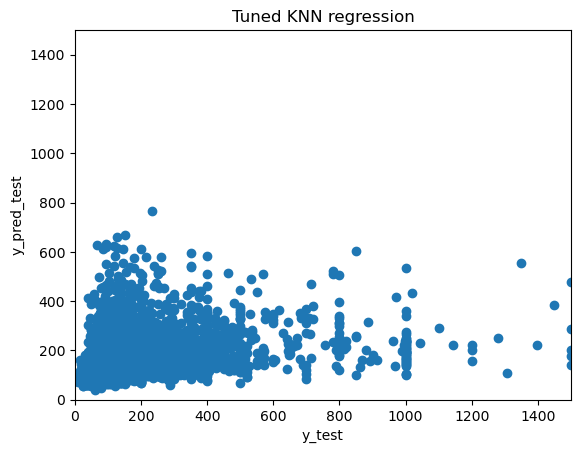

In [81]:
# Plotting the results from the Tuned KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.title('Tuned KNN regression')
plt.show()

In [82]:
# Checking the model performance on the new data
y_new_pred = knn_model_best.predict(X_dec)
knn_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
knn_tuned_new_rmse = np.sqrt(knn_tuned_new_mse)
knn_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
knn_tuned_new_r2 = knn_model_best.score(X_dec, y_dec)
print('New MSE:', knn_tuned_new_mse, '\n', 'New RMSE:', knn_tuned_new_rmse,
      '\n', 'New MAE:', knn_tuned_new_mae, '\n', 'New R2:', knn_tuned_new_r2)

New MSE: 32137.65695943725 
 New RMSE: 179.2697881948803 
 New MAE: 81.67906095734695 
 New R2: 0.03129067700475052


In [83]:
# Recording the results
models.append('KNN - Tuned')
Train_RMSE.append(knn_tuned_train_rmse)
Test_RMSE.append(knn_tuned_test_rmse)
Dec_RMSE.append(knn_tuned_new_rmse)

# Model 5: Random Forest Regression

In [84]:
# Creating a random forest regression model
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model.predict(X_train)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_train_r2 = rf_model.score(X_train, y_train)
print('Training MSE:', rf_train_mse, '\n', 'Training RMSE:', rf_train_rmse, '\n', 'Training MAE:', rf_train_mae, '\n', 'Training R2:', rf_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_test_r2 = rf_model.score(X_test, y_test)
print('Test MSE:', rf_test_mse, '\n', 'Test RMSE:', rf_test_rmse, '\n', 'Test MAE:', rf_test_mae, '\n', 'Test R2:', rf_test_r2)

Training MSE: 5566.7022771211705 
 Training RMSE: 74.61033626194946 
 Training MAE: 26.129951709186127 
 Training R2: 0.8844113026899368
Test MSE: 38173.37336072838 
 Test RMSE: 195.38007411383686 
 Test MAE: 70.02306418756606 
 Test R2: 0.2554721997722207


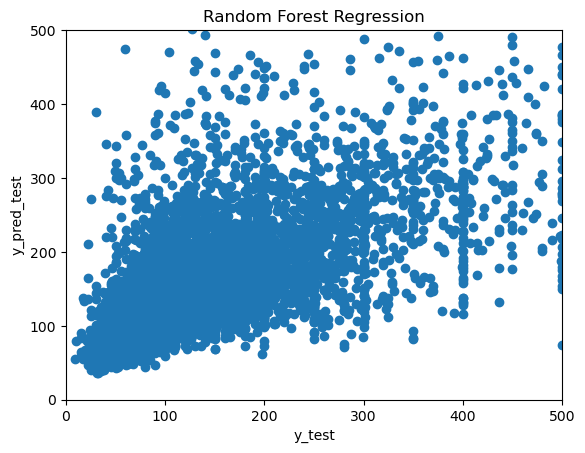

In [85]:
# Plotting the results from the Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.title('Random Forest Regression')
plt.show()

In [86]:
# Checking the model performance on the new data
y_new_pred = rf_model.predict(X_dec)
rf_new_mse = mean_squared_error(y_dec, y_new_pred)
rf_new_rmse = np.sqrt(rf_new_mse)
rf_new_mae = np.mean(np.abs(y_dec - y_new_pred))
rf_new_r2 = rf_model.score(X_dec, y_dec)
print('New MSE:', rf_new_mse, '\n', 'New RMSE:', rf_new_rmse, '\n', 'New MAE:', rf_new_mae, '\n', 'New R2:', rf_new_r2)


New MSE: 34809.02779182416 
 New RMSE: 186.57177651462763 
 New MAE: 83.02504088367454 
 New R2: -0.04923111815215764


In [87]:
# Recording the results
models.append('Random Forest - Default')
Train_RMSE.append(rf_train_rmse)
Test_RMSE.append(rf_test_rmse)
Dec_RMSE.append(rf_new_rmse)

In [88]:
"""# defining the grid of parameters
param_grid = {"n_estimators": np.arange(200, 500, 100), "max_features": ['sqrt'], 'bootstrap': [True, False]}

# defining the model
rf_model_cv = RandomForestRegressor(random_state=42)
# defining the random search
rf_cv = RandomizedSearchCV(rf_model_cv, param_grid, cv = 5)

# fitting the model to the training data
rf_cv.fit(X_train, y_train)

# storing the best parameters
best_params = rf_cv.best_params_

# printing the best parameters
print("Tuned Random Forest Parameters: {}".format(best_params))"""

'# defining the grid of parameters\nparam_grid = {"n_estimators": np.arange(200, 500, 100), "max_features": [\'sqrt\'], \'bootstrap\': [True, False]}\n\n# defining the model\nrf_model_cv = RandomForestRegressor(random_state=42)\n# defining the random search\nrf_cv = RandomizedSearchCV(rf_model_cv, param_grid, cv = 5)\n\n# fitting the model to the training data\nrf_cv.fit(X_train, y_train)\n\n# storing the best parameters\nbest_params = rf_cv.best_params_\n\n# printing the best parameters\nprint("Tuned Random Forest Parameters: {}".format(best_params))'

In [89]:
# Creating a random forest regression model with the best parameters
best_params = {'n_estimators': 210, 'max_features': 'sqrt', 'bootstrap': False}

rf_model_best = RandomForestRegressor(**best_params)

# Fitting the model to the training data
rf_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model_best.predict(X_train)
rf_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
rf_tuned_train_rmse = np.sqrt(rf_tuned_train_mse)
rf_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_tuned_train_r2 = rf_model_best.score(X_train, y_train)
print('Training MSE:', rf_tuned_train_mse, '\n', 'Training RMSE:', rf_tuned_train_rmse,
      '\n', 'Training MAE:', rf_tuned_train_mae, '\n', 'Training R2:', rf_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model_best.predict(X_test)
rf_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
rf_tuned_test_rmse = np.sqrt(rf_tuned_test_mse)
rf_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_tuned_test_r2 = rf_model_best.score(X_test, y_test)
print('Test MSE:', rf_tuned_test_mse, '\n', 'Test RMSE:', rf_tuned_test_rmse,
      '\n', 'Test MAE:', rf_tuned_test_mae, '\n', 'Test R2:', rf_tuned_test_r2)

Training MSE: 0.12037170453364393 
 Training RMSE: 0.3469462559729445 
 Training MAE: 0.010298528462985103 
 Training R2: 0.9999975005653567
Test MSE: 38764.61045195002 
 Test RMSE: 196.88730393793813 
 Test MAE: 72.63186694395256 
 Test R2: 0.24394079942201796


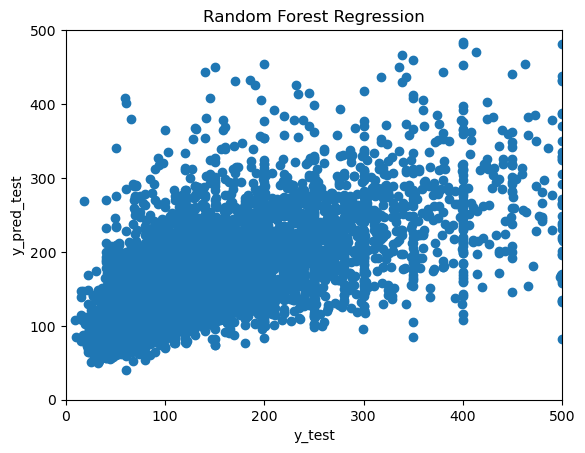

In [90]:
# Plotting the results from the Tuned Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.title('Random Forest Regression')
plt.show()

In [91]:
# Checking the model performance on the new data
y_new_pred = rf_model_best.predict(X_dec)
rf_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
rf_tuned_new_rmse = np.sqrt(rf_tuned_new_mse)
rf_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
rf_tuned_new_r2 = rf_model_best.score(X_dec, y_dec)
print('New MSE:', rf_tuned_new_mse, '\n', 'New RMSE:', rf_tuned_new_rmse,
      '\n', 'New MAE:', rf_tuned_new_mae, '\n', 'New R2:', rf_tuned_new_r2)

New MSE: 25038.33817368612 
 New RMSE: 158.23507251455385 
 New MAE: 73.3749032555504 
 New R2: 0.245281893083524


In [92]:
# Recording the results
models.append('Random Forest - Tuned')
Train_RMSE.append(rf_tuned_train_rmse)
Test_RMSE.append(rf_tuned_test_rmse)
Dec_RMSE.append(rf_tuned_new_rmse)

# Model 6: GBM

In [93]:
# Creating a gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor

GBM_model = GradientBoostingRegressor(random_state=42)

# Fitting the model to the training data
GBM_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = GBM_model.predict(X_train)
GBM_train_mse = mean_squared_error(y_train, y_train_pred)
GBM_train_rmse = np.sqrt(GBM_train_mse)
GBM_train_mae = np.mean(np.abs(y_train - y_train_pred))
GBM_train_r2 = GBM_model.score(X_train, y_train)
print('Training MSE:', GBM_train_mse, '\n', 'Training RMSE:', GBM_train_rmse,
      '\n', 'Training MAE:', GBM_train_mae, '\n', 'Training R2:', GBM_train_r2)

# Checking the model performance on the test data
y_test_pred = GBM_model.predict(X_test)
GBM_test_mse = mean_squared_error(y_test, y_test_pred)
GBM_test_rmse = np.sqrt(GBM_test_mse)
GBM_test_mae = np.mean(np.abs(y_test - y_test_pred))
GBM_test_r2 = GBM_model.score(X_test, y_test)
print('Test MSE:', GBM_test_mse, '\n', 'Test RMSE:', GBM_test_rmse,
      '\n', 'Test MAE:', GBM_test_mae, '\n', 'Test R2:', GBM_test_r2)

Training MSE: 35193.48674046693 
 Training RMSE: 187.5992716949267 
 Training MAE: 72.16154369898328 
 Training R2: 0.2692317491365265
Test MSE: 40240.103387706644 
 Test RMSE: 200.5993603870826 
 Test MAE: 74.3630375005708 
 Test R2: 0.215163004509068


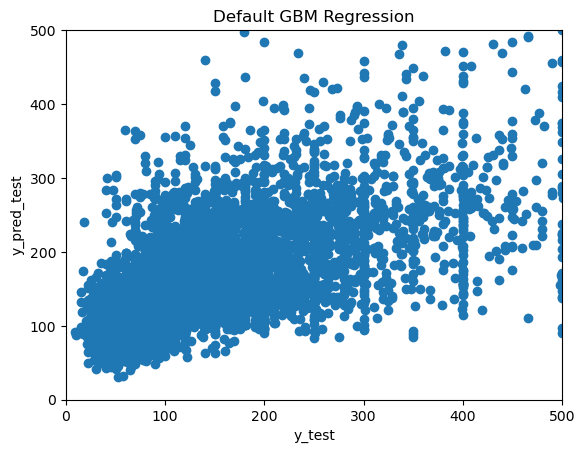

In [94]:
# Plotting the results from the Default GBM model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.title('Default GBM Regression')
plt.show()


In [95]:
# Checking the model performance on the new data
y_new_pred = GBM_model.predict(X_dec)
GBM_new_mse = mean_squared_error(y_dec, y_new_pred)
GBM_new_rmse = np.sqrt(GBM_new_mse)
GBM_new_mae = np.mean(np.abs(y_dec - y_new_pred))
GBM_new_r2 = GBM_model.score(X_dec, y_dec)
print('New MSE:', GBM_new_mse, '\n', 'New RMSE:', GBM_new_rmse,
      '\n', 'New MAE:', GBM_new_mae, '\n', 'New R2:', GBM_new_r2)

New MSE: 30225.957486921994 
 New RMSE: 173.8561402048314 
 New MAE: 80.79538708268322 
 New R2: 0.08891407824174768


In [96]:
# Recording the results
models.append('GBM - Default')
Train_RMSE.append(GBM_train_rmse)
Test_RMSE.append(GBM_test_rmse)
Dec_RMSE.append(GBM_new_rmse)

In [97]:
# storing the results in a dataframe using the above lists
results = pd.DataFrame({'Model': models, 'Train_RMSE': Train_RMSE, 'Test_RMSE': Test_RMSE, 'Dec_RMSE': Dec_RMSE})

# sorting the results based on the test RMSE
results = results.sort_values(by='Test_RMSE', ascending=True)

# printing the results only by 2 decimal points
pd.options.display.float_format = '{:,.2f}'.format
results

,Model,Train_RMSE,Test_RMSE,Dec_RMSE
5,Random Forest - Default,74.61,195.38,186.57
6,Random Forest - Tuned,0.35,196.89,158.24
7,GBM - Default,187.60,200.60,173.86
2,Decision Tree - Tuned,191.56,205.56,194.34
4,KNN - Tuned,0.34,213.13,179.27
3,KNN - Default,176.75,213.91,194.28
0,OLS,205.50,213.97,180.35
1,Decision Tree - Default,0.34,243.49,298.26


In [98]:
import shap

In [100]:
# Create a SHAP explainer object for your Random Forest model
explainer = shap.TreeExplainer(rf_model_best)

# Compute SHAP values for your data
shap_values = explainer.shap_values(X_train[:10])

In [103]:
# Select SHAP values for the first instance
shap_value_single = shap_values[1][1]  # Assuming binary classification or regression

# Corresponding features for the first instance
features_single = X.iloc[1]

In [104]:
shap.force_plot(explainer.expected_value[0], shap_value_single, features_single)


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [108]:
shap.decision_plot(explainer.expected_value[0], shap_value_single, features_single)


TypeError: The shap_values arg is the wrong type. Try explainer.shap_values().